# 下準備

In [ ]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

**日本語を表示するための準備**

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


Text(0.5, 1.0, '日本語を表示できるかテスト')

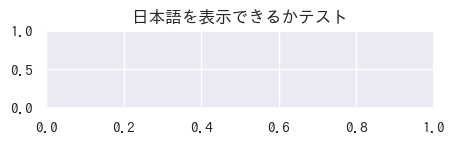

In [ ]:
!apt-get update -qq
!apt-get install fonts-ipafont-gothic -qq

from matplotlib import font_manager

# インストールしたフォントのパスを取得
font_path = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

# フォントを Matplotlib に追加
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'IPAGothic'

sns.set(font='IPAGothic')

# 動作確認
plt.figure(figsize=(5,1))
plt.title('日本語を表示できるかテスト')

**データ読込**

*「基礎的なコード集」で作成したデータセットを用います*

In [ ]:
# Googleドライブをマウント
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Excelファイルを読み込み、データフレームに格納
df = pd.read_csv("/content/drive/MyDrive/カスタムデータセット/data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   能力評価      5000 non-null   float64
 1   性格診断結果    5000 non-null   int64  
 2   思索型:内閉性   5000 non-null   float64
 3   自制型:弱気さ   5000 non-null   float64
 4   従順性       5000 non-null   float64
 5   ﾓﾗﾄﾘｱﾑ傾向  5000 non-null   float64
 6   自己信頼性     5000 non-null   float64
 7   努力型:持続性   5000 non-null   float64
 8   積極性       5000 non-null   float64
 9   協調性       5000 non-null   float64
 10  共感性       5000 non-null   float64
 11  努力型:規則性   5000 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 468.9 KB


In [ ]:
df.head(10)

,能力評価,性格診断結果,思索型:内閉性,自制型:弱気さ,従順性,ﾓﾗﾄﾘｱﾑ傾向,自己信頼性,努力型:持続性,積極性,協調性,共感性,努力型:規則性
0,B,4,49.7355,54.83225,50.00000,30.0000,54.000,51.00000,52.00000,44.8645,52.0000,55.0000
1,B,0,48.0000,38.00000,55.00000,41.0000,34.000,40.00000,63.00000,53.0000,26.0000,53.8765
2,B,4,49.7355,54.83225,45.00000,51.0000,39.000,39.53575,61.00000,74.0000,57.0000,62.0000
3,B,6,64.0000,54.83225,32.00000,54.0000,36.000,69.00000,48.00000,44.0000,31.5885,46.0000
4,B,0,72.0000,62.00000,42.00000,43.7975,42.000,21.00000,50.13425,61.0000,21.0000,53.8765
5,B,2,50.0000,62.00000,24.00000,53.0000,38.418,51.00000,74.00000,71.0000,59.0000,51.0000
6,A,1,44.0000,37.00000,44.02225,44.0000,38.418,39.53575,65.00000,41.0000,20.0000,44.0000
7,A,6,49.0000,74.00000,44.02225,33.0000,38.000,59.00000,50.13425,47.0000,31.5885,35.0000
8,B,0,49.7355,54.83225,53.00000,42.0000,33.000,54.00000,38.00000,14.0000,31.5885,61.0000
9,B,5,49.7355,54.83225,39.00000,54.0000,38.418,50.00000,57.00000,44.8645,12.0000,53.8765


# ランダムフォレストの構築

**ランダムフォレスト**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ランダムフォレストモデルの訓練
best_model = RandomForestRegressor(random_state=1234)
best_model.fit(X_train, y_train)

# 予測
y_pred = best_model.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.13285992907801425
Root Mean Squared Error (RMSE): 0.3644995597775315
Mean Absolute Error (MAE): 0.2700354609929079


In [ ]:
import numpy as np

# NumPy配列に変換して特徴量名を削除
X_test_array = X_test.to_numpy()

# 各決定木のMSEまたはMAEを計算する
best_tree_index = -1
best_mse = float('inf')

# テストセットで各決定木を評価
for i, tree in enumerate(best_model.estimators_):
    y_pred_tree = tree.predict(X_test_array)  # NumPy配列を使用
    mse_tree = mean_squared_error(y_test, y_pred_tree)

    # MSEが小さい方の決定木を選択
    if mse_tree < best_mse:
        best_mse = mse_tree
        best_tree_index = i

print(f'Best Decision Tree Index: {best_tree_index}, MSE: {best_mse}')

# 最良の決定木を取得
best_tree = best_model.estimators_[best_tree_index]

# 決定木をエクスポート
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X_train.columns,  # フィーチャー名を使用
    filled=True,
    rounded=True,
    special_characters=True
)

# グラフを生成
graph = pydotplus.graph_from_dot_data(dot_data)

# グラフを表示
Image(graph.create_png())


Output hidden; open in https://colab.research.google.com to view.